# Data exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
# Source: https://archive.ics.uci.edu/dataset/352/online+retail
data = pd.read_excel('../data/Online Retail.xlsx')
data.shape

(541909, 8)

## Overall structure

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Missing values

In [5]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Data Structure after Cleaning

In [7]:
data.shape

(406829, 8)

In [8]:
N_Invoices = len(data["InvoiceNo"].unique())
print(f"Number of unique invoices: {N_Invoices}")

N_customer = len(data["CustomerID"].unique())
print(f"Number of unique customers: {N_customer}")

Number of unique invoices: 22190
Number of unique customers: 4372


In [9]:
data.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [10]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


## Purchases and Returns

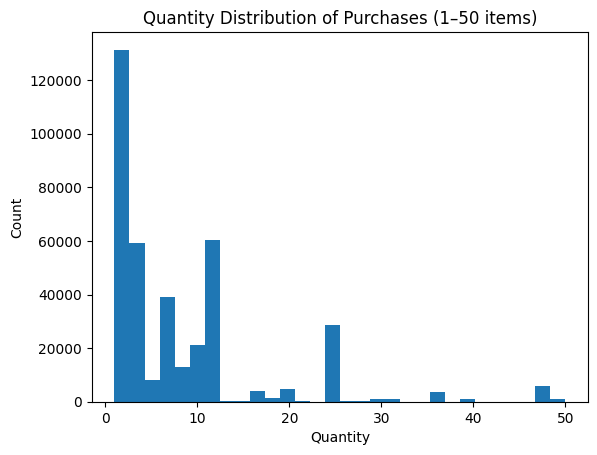

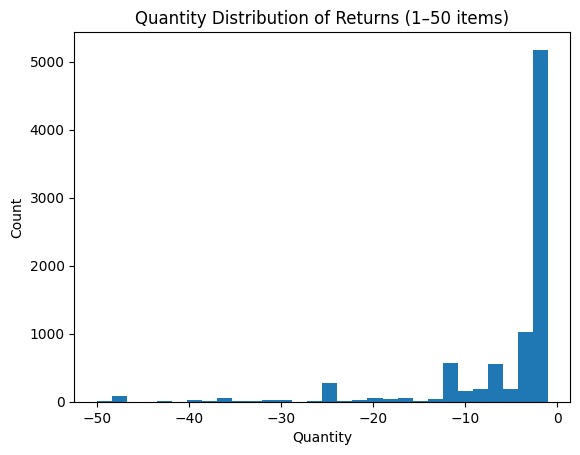

In [11]:
# Plot histogram of purchases and retuns
purchases = data[data["Quantity"] > 0]
returns = data[data["Quantity"] < 0]

# Purchases
plt.hist(
    purchases["Quantity"],
    bins=30,
    range=(1, 50)
)
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.title("Quantity Distribution of Purchases (1–50 items)")
plt.show()

# Returns
plt.hist(
    returns["Quantity"],
    bins=30,
    range=(-50, -1)
)
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.title("Quantity Distribution of Returns (1–50 items)")
plt.show()

## Transaction frequency distribution

In [12]:
orders_per_customer = (
    data
    .groupby("CustomerID")["InvoiceNo"]
    .nunique()
)

In [13]:
# Summary statistics of orders per customer
orders_per_customer.describe()

count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: InvoiceNo, dtype: float64

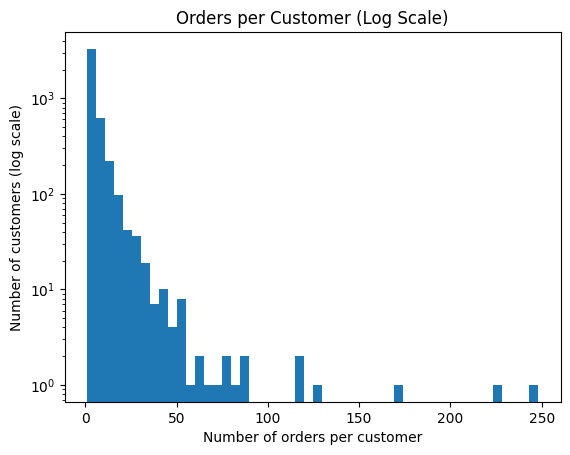

In [14]:
# Plot histogram of orders per customer
plt.hist(orders_per_customer, bins=50)
plt.yscale("log")
plt.xlabel("Number of orders per customer")
plt.ylabel("Number of customers (log scale)")
plt.title("Orders per Customer (Log Scale)")
plt.show()

## Revenue distribution

In [15]:
data["Revenue"] = data["Quantity"] * data["UnitPrice"]
revenue_per_customer = (
    data
    .groupby("CustomerID")["Revenue"]
    .sum()
)

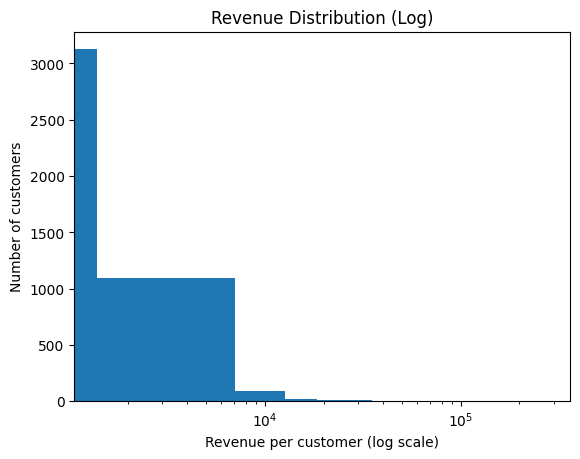

In [16]:
plt.hist(revenue_per_customer, bins=50)
plt.xscale("log")
plt.xlabel("Revenue per customer (log scale)")
plt.ylabel("Number of customers")
plt.title("Revenue Distribution (Log)")
plt.show()

## Cumulative revenue distribution

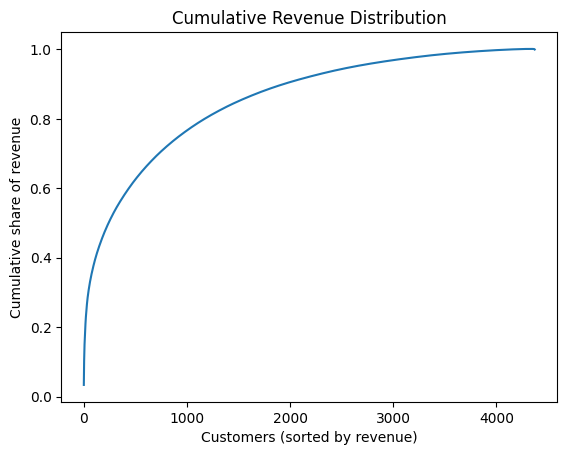

In [17]:
rev_sorted = revenue_per_customer.sort_values(ascending=False)
cum_rev = rev_sorted.cumsum() / rev_sorted.sum()

plt.plot(cum_rev.values)
plt.xlabel("Customers (sorted by revenue)")
plt.ylabel("Cumulative share of revenue")
plt.title("Cumulative Revenue Distribution")
plt.show()

## Revenue per order

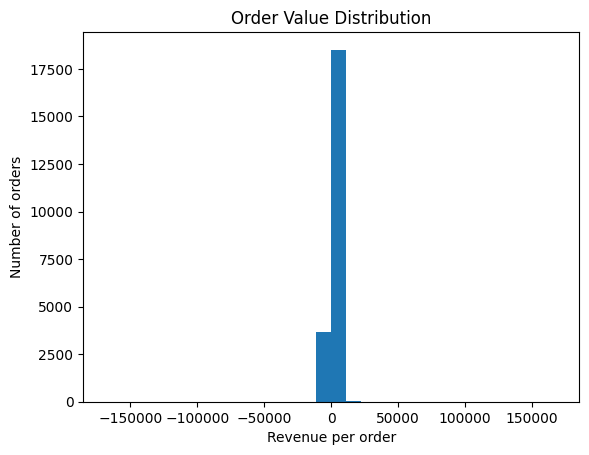

In [18]:
revenue_per_invoice = (
    data
    .groupby("InvoiceNo")["Revenue"]
    .sum()
)

plt.hist(revenue_per_invoice, bins=30)
plt.xlabel("Revenue per order")
plt.ylabel("Number of orders")
plt.title("Order Value Distribution")
plt.show()

In [19]:
revenue_per_invoice.describe()

count     22190.000000
mean        374.045327
std        2018.482869
min     -168469.600000
25%          87.962500
50%         241.505000
75%         418.022500
max      168469.600000
Name: Revenue, dtype: float64

# Save preprocessed data

In [20]:
data.to_csv('../data/online_retail_cleaned.csv', index=False)